In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

## Data Apple

In [200]:
today=pd.Timestamp.today()
start=today-pd.Timedelta(days=365)
start_date=start.strftime('%Y-%m-%d')

In [201]:
start_date

'2022-04-17'

In [202]:
symbol='AApl'
df_apple=yf.download(symbol,start=start_date,end=today)[['Adj Close']].copy()

[*********************100%***********************]  1 of 1 completed


In [203]:
df_apple.head()

,Adj Close
Date,
2022-04-18,164.076080
2022-04-19,166.392029
2022-04-20,166.223068
2022-04-21,165.417953
2022-04-22,160.815826


In [204]:
#logarithmic returns
df_apple['returns']=np.log(df_apple['Adj Close'] / df_apple['Adj Close'].shift(1))

In [205]:
df_apple.dropna(inplace=True)

In [206]:
df_apple.head()

,Adj Close,returns
Date,,
2022-04-19,166.392029,0.014016
2022-04-20,166.223068,-0.001016
2022-04-21,165.417953,-0.004855
2022-04-22,160.815826,-0.028216
2022-04-25,161.899261,0.006715


In [207]:
mean_returns=df_apple['returns'].mean()
std_returns=df_apple['returns'].std()

In [208]:
mean_returns

2.7659469570303594e-05

In [209]:
std_returns

0.021789984474388634

In [210]:
#simulacion de los precios para los primeros 10 dias 
1+np.random.normal(mean_returns,std_returns,10)

array([0.98756993, 0.99787877, 0.99043848, 1.01640596, 0.9703659 ,
       1.00869393, 1.02190108, 0.96487007, 1.04294265, 1.02285358])

## Montecarlo Simulation

In [211]:
def montecarlo_simulation(df_prices,n_simulations=10000,n_days=30,mu=0,sigma=1):
  simulated_prices=np.zeros((n_simulations,n_days))
  initial_price=df_prices.iloc[-1] #last price
  simulated_prices[:,0]=initial_price

  for i in range (1,n_days):
    simulated_prices[:,i]=simulated_prices[:,i-1]*(1+np.random.normal(mu,sigma,n_simulations))
  return simulated_prices

In [212]:
simulated_prices=montecarlo_simulation(df_apple['Adj Close'],n_simulations=10000,n_days=30,mu=mean_returns,sigma=std_returns)

In [213]:
simulated_prices

array([[165.21000671, 162.97744287, 156.41088902, ..., 170.69916425,
        171.02938443, 161.38559372],
       [165.21000671, 172.3301396 , 175.31642967, ..., 169.97071146,
        163.33210615, 165.07177352],
       [165.21000671, 170.69864488, 172.85200548, ..., 171.78832319,
        176.04578457, 170.40118233],
       ...,
       [165.21000671, 162.82305844, 161.39659442, ..., 161.881038  ,
        166.31524748, 162.10088169],
       [165.21000671, 168.17504137, 164.42556398, ..., 154.30301731,
        158.64111324, 158.17154862],
       [165.21000671, 169.89707805, 173.6964899 , ..., 174.38744057,
        177.06966447, 184.67811883]])

In [214]:
simulated_prices_flat=simulated_prices[:,1:].flatten()

In [215]:
#existe 29000 datos flat
len(simulated_prices_flat)

290000

In [216]:
percentil_5=np.percentile(simulated_prices_flat,5)

In [217]:
print(f'Precio del 95% es {percentil_5:.2f}')

Precio del 95% es 142.85


In [218]:
#percentile 2.5
percentil_2_5=np.percentile(simulated_prices_flat,2.5)
#percentile 97.5
percentil_97_5=np.percentile(simulated_prices_flat,97.5)

In [219]:
print(f'95% de confianza esta entre {percentil_2_5:.2f} y {percentil_97_5:.2f}')

95% de confianza esta entre 138.06 y 195.88


In [220]:
expected_value=np.mean(simulated_prices[:,-1])
expected_value

165.42429584045433

In [221]:
expected_value.round(4)

165.4243

In [222]:
simulated_prices.T

array([[165.21000671, 165.21000671, 165.21000671, ..., 165.21000671,
        165.21000671, 165.21000671],
       [162.97744287, 172.3301396 , 170.69864488, ..., 162.82305844,
        168.17504137, 169.89707805],
       [156.41088902, 175.31642967, 172.85200548, ..., 161.39659442,
        164.42556398, 173.6964899 ],
       ...,
       [170.69916425, 169.97071146, 171.78832319, ..., 161.881038  ,
        154.30301731, 174.38744057],
       [171.02938443, 163.33210615, 176.04578457, ..., 166.31524748,
        158.64111324, 177.06966447],
       [161.38559372, 165.07177352, 170.40118233, ..., 162.10088169,
        158.17154862, 184.67811883]])

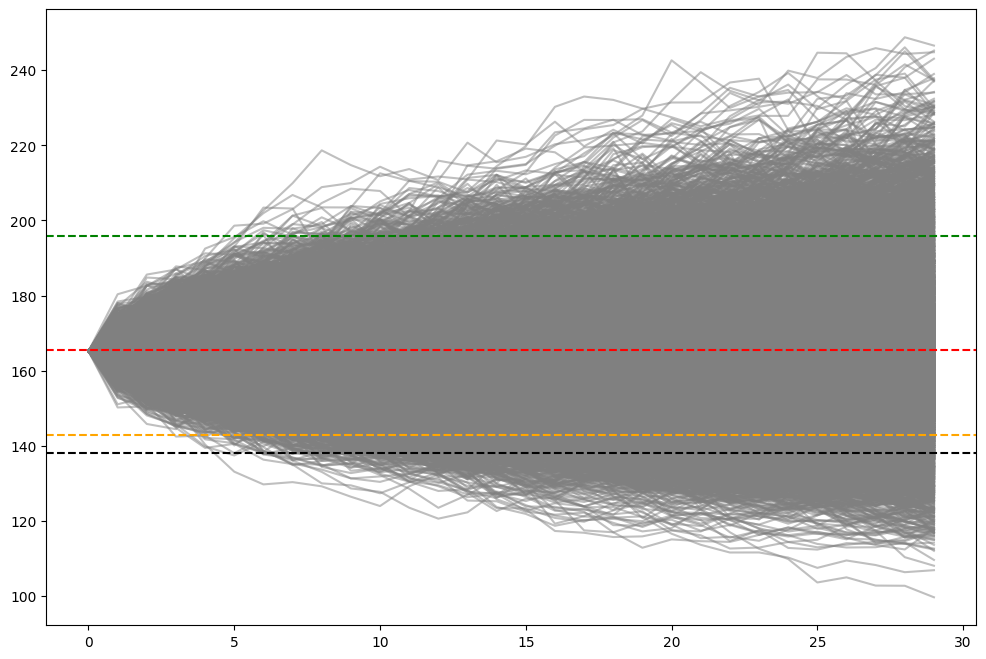

In [226]:
plt.figure(figsize=(12,8))
plt.plot(simulated_prices.T,color='gray',alpha=0.5)
plt.axhline(percentil_97_5,color='green',linestyle='--')
plt.axhline(percentil_5,color='orange',linestyle='--')
plt.axhline(percentil_2_5,color='black',linestyle='--')
plt.axhline(expected_value,color='red',linestyle='--')
plt.show()

In [227]:
df_apple.tail()

,Adj Close,returns
Date,,
2023-04-10,162.029999,-0.016101
2023-04-11,160.800003,-0.007620
2023-04-12,160.100006,-0.004363
2023-04-13,165.559998,0.033535
2023-04-14,165.210007,-0.002116


In [229]:
#el valor esperado Adj Close de las acciones de apple  para la fecha de hoy es:
expected_value

165.42429584045433